# Copulas

In this example, we demonstrate how to apply copulas within the context of the probabilistic library.

The library allows you to correlate two random variables using a copula function. The following copulas are available in the library: `gaussian`, `gumbel`, `clayton`, and `frank`.

> Note: another way to correlate random variables is to use a correlation matrix.

First, let's import the necessary classes:

In [220]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, CorrelationType, CopulaType

We consider the limit state function used for wave run-up calculations:

In [221]:
from utils.models import hunt

We define a reliability project using `ReliabilityProject()` and reference to the limit state function:

In [222]:
project = ReliabilityProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


We assign the following probability distributions to the input parameters of the limit state function:

In [223]:
project.variables["t_p"].distribution = DistributionType.uniform
project.variables["t_p"].minimum = 0.01
project.variables["t_p"].maximum = 3.0

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0.01
project.variables["h_s"].maximum = 3.0

project.variables["h_crest"].distribution = DistributionType.deterministic
project.variables["h_crest"].mean = 3.0

project.variables["h"].distribution = DistributionType.deterministic
project.variables["h"].mean = 1.0

The reliability analysis is performed using the `crude_monte_carlo` method:

In [224]:
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.minimum_samples = 10000
project.settings.maximum_samples = 10000
project.settings.variation_coefficient = 0.05
project.settings.save_realizations = True

### Gaussian copula

Let's correlate the variables $h_s$ and $t_p$ using a Gaussian copula.

It is then necessary to use copulas as the correlation type, `CorrelationType.copulas`, and to specify both the `CopulaType` and the corresponding copula parameter.

The parameter of a Gaussian copula is a correlation coefficient that can range between $-1$ and $1$.

In [228]:
par = 0.8

project.correlation_type = CorrelationType.copulas
project.copulas["h_s", "t_p"] = (par, CopulaType.gaussian)

We now perform the reliability calculations and plot the realizations of the variables $h_s$ and $t_p$:

Reliability:
 Reliability index = 1.765
 Probability of failure = 0.0388
 Convergence = 0.04977 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.3609, x = 2.866
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.9326, x = 2.851
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

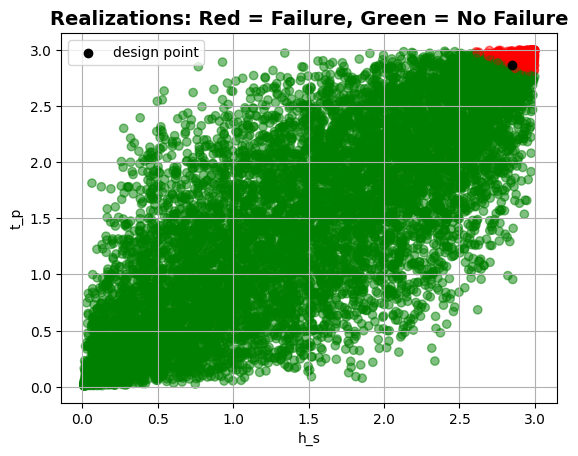

In [229]:
project.run()

project.design_point.print()
project.design_point.get_plot_realizations("h_s", "t_p")

### Gumbel copula

Let's now correlate the variables $h_s$ and $t_p$ using a Gumbel copula. The copula parameter must be greater than or equal to $1.0$.

Reliability:
 Reliability index = 1.643
 Probability of failure = 0.0502
 Convergence = 0.0435 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.1174, x = 2.847
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.9931, x = 2.846
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

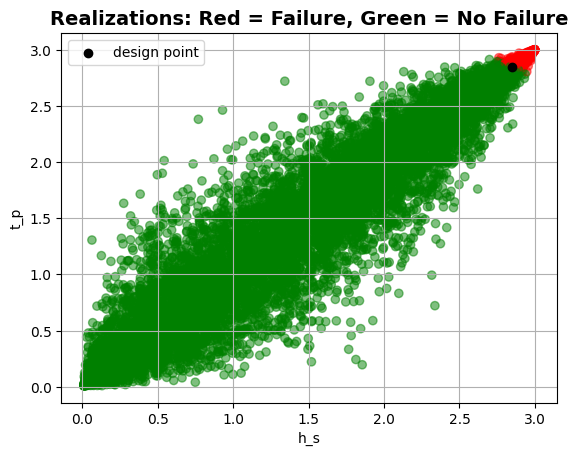

In [230]:
par = 5.0

project.correlation_type = CorrelationType.copulas
project.copulas["h_s", "t_p"] = (par, CopulaType.gumbel)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations("h_s", "t_p")


### Clayton copula

Let's now correlate the variables $h_s$ and $t_p$ using a Clayton copula. The copula parameter must be greater than or equal to $-1.0$ and cannot be equal to $0.0$.

Reliability:
 Reliability index = 1.951
 Probability of failure = 0.0255
 Convergence = 0.06182 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.9142, x = 2.889
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.4053, x = 2.861
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

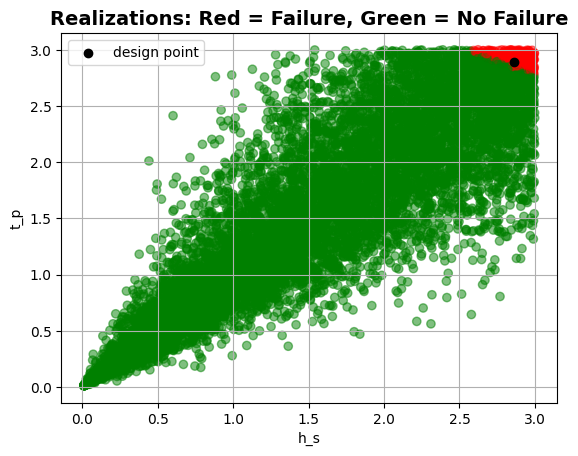

In [232]:
par = 5.0

project.correlation_type = CorrelationType.copulas
project.copulas["t_p", "h_s"] = (par, CopulaType.clayton)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations("h_s", "t_p")

### Frank copula

Let's correlate the variables $h_s$ and $t_p$ using a Frank copula. The copula parameter can be any real number except $0.0$.

Reliability:
 Reliability index = 1.844
 Probability of failure = 0.0326
 Convergence = 0.05447 (not converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.5017, x = 2.905
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.8651, x = 2.835
 h_crest: alpha = 0, x = 3
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

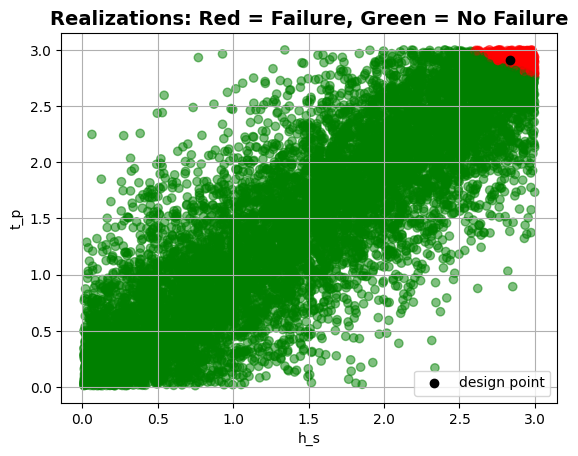

In [233]:
par = 10.0

project.correlation_type = CorrelationType.copulas
project.copulas["h_s", "t_p"] = (par, CopulaType.frank)
project.run()

project.design_point.print()
project.design_point.get_plot_realizations("h_s", "t_p")

Now, let us assume that the parameters $\tan_{\alpha}$ and $h_{crest}$ are also random variables. It is then possible, for example, to correlate $h_s$ with $t_p$ and $\tan_{\alpha}$ with $h_{crest}$.

Reliability:
 Reliability index = 0.9998
 Probability of failure = 0.1587
 Convergence = 0.02302 (converged)
 Model runs = 10001
Alpha values:
 t_p: alpha = -0.1544, x = 2.49
 tan_alpha: alpha = -0.2649, x = 0.4328
 h_s: alpha = -0.9512, x = 2.489
 h_crest: alpha = 0.03514, x = 3.055
 h: alpha = 0, x = 1



<module 'matplotlib.pyplot' from 'c:\\Users\\wojciech\\AppData\\Local\\miniforge3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

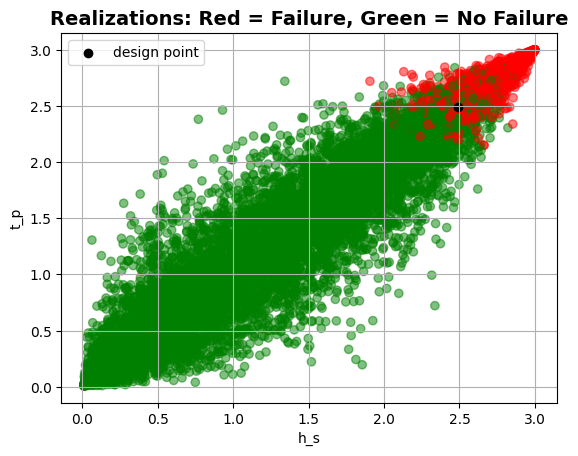

In [234]:
project.variables["h_crest"].distribution = DistributionType.uniform
project.variables["h_crest"].minimum = 3.0
project.variables["h_crest"].maximum = 3.1

project.variables["tan_alpha"].distribution = DistributionType.uniform
project.variables["tan_alpha"].minimum = 0.33
project.variables["tan_alpha"].maximum = 0.5

project.correlation_type = CorrelationType.copulas
project.copulas["h_s", "t_p"] = (5.0, CopulaType.gumbel)
project.copulas["tan_alpha", "h_crest"] = (3.0, CopulaType.frank)

project.run()
project.design_point.print()
project.design_point.get_plot_realizations("h_s", "t_p")

However, it is not possible to correlate the variables $t_p$ with $h_{crest}$, because the library only supports two-dimensional copulas.

In [235]:
project.copulas["t_p", "h_crest"] = (5.0, CopulaType.gumbel)

project.run()

Error: Multiple correlations not allowed for copulas, found for correlations t_p-h_crest and h_s-t_p
Error: Multiple correlations not allowed for copulas, found for correlations t_p-h_crest and tan_alpha-h_crest
